# Programming Assignment: Бэггинг и случайный лес

Загрузите датасет digits с помощью функции load_digits из sklearn.datasets и подготовьте матрицу признаков X и ответы на обучающей выборке y (вам потребуются поля data и target в объекте, который возвращает load_digits).

In [4]:
from sklearn import datasets
import numpy as np
import pandas as pd

In [5]:
digits = datasets.load_digits()
X = digits.data
y = digits.target

Для оценки качества далее нужно будет использовать cross_val_score из sklearn.cross_validation с параметром cv=10. Эта функция реализует k-fold cross validation c k равным значению параметра cv. Мы предлагаем использовать k=10, чтобы полученные оценки качества имели небольшой разброс, и было проще проверить полученные ответы. На практике же часто хватает и k=5. Функция cross_val_score будет возвращать numpy.ndarray, в котором будет k чисел - качество в каждом из k экспериментов k-fold cross validation. Для получения среднего значения (которое и будет оценкой качества работы) вызовите метод .mean() у массива, который возвращает cross_val_score.
С небольшой вероятностью вы можете натолкнуться на случай, когда полученное вами качество в каком-то из пунктов не попадет в диапазон, заданный для правильных ответов - в этом случае попробуйте перезапустить ячейку с cross_val_score несколько раз и выбрать наиболее «типичное» значение. Если это не помогает, то где-то была допущена ошибка.

Если вам захочется ускорить вычисление cross_val_score - можете попробовать использовать параметр n_jobs, но будьте осторожны: в одной из старых версий sklearn была ошибка, которая приводила к неверному результату работы cross_val_score при задании n_jobs отличным от 1. Сейчас такой проблемы возникнуть не должно, но проверить, что все в порядке, не будет лишним.


In [6]:
from sklearn import model_selection
from sklearn import tree# instead of cross_validation, which is depricated

### 1.Создайте DecisionTreeClassifier с настройками по умолчанию и измерьте качество его работы с помощью cross_val_score. Эта величина и будет ответом в пункте 1.

In [25]:
def calculate_mean_score(estimator):
    return model_selection.cross_val_score(estimator, X=X, y=y, cv=10, n_jobs=-1).mean()

In [28]:
clf = tree.DecisionTreeClassifier(random_state=1)
clf_mean_score = calculate_mean_score(clf)

In [50]:
clf_mean_score

0.83086244395038344

In [31]:
def write_answer(answer, file_name):
    """Writes an answer, to the txt file with the name file_name"""
    file_name_full = file_name + '.txt'
    with open(file_name_full, "w") as fout:
        fout.write(str(answer))

In [30]:
write_answer(clf_mean_score, 'ans1')

### 2. Воспользуйтесь BaggingClassifier из sklearn.ensemble, чтобы обучить бэггинг над DecisionTreeClassifier. Используйте в BaggingClassifier параметры по умолчанию, задав только количество деревьев равным 100.
Качество классификации новой модели - ответ в пункте 2. Обратите внимание, как соотносится качество работы композиции решающих деревьев с качеством работы одного решающего дерева.

In [19]:
from sklearn import ensemble

In [32]:
bagging_clf = ensemble.BaggingClassifier(n_estimators=100, random_state=1)
bagging_mean_score = calculate_mean_score(bagging_clf)

In [49]:
bagging_mean_score

0.92711025726034357

In [22]:
write_answer(bagging_mean_score, 'ans2')

### 3.Теперь изучите параметры BaggingClassifier и выберите их такими, чтобы каждый базовый алгоритм обучался не на всех d признаках, а на $\sqrt{d}$ случайных признаков. 
Качество работы получившегося классификатора - ответ в пункте 3. Корень из числа признаков - часто используемая эвристика в задачах классификации, в задачах регрессии же часто берут число признаков, деленное на три. Но в общем случае ничто не мешает вам выбирать любое другое число случайных признаков.

In [35]:
from math import sqrt

In [47]:
d = int(X.shape[1])
n_features = int(sqrt(d))
bag_const_feat_clf = ensemble.BaggingClassifier(n_estimators=100, max_features=n_features, random_state=1)
bag_const_feat_mean_score = calculate_mean_score(bag_const_feat_clf)

In [48]:
bag_const_feat_mean_score

0.93381012890755399

In [51]:
write_answer(bag_const_feat_mean_score, 'ans3')

### 4.Наконец, давайте попробуем выбирать случайные признаки не один раз на все дерево, а при построении каждой вершины дерева. Сделать это несложно: нужно убрать выбор случайного подмножества признаков в BaggingClassifier и добавить его в DecisionTreeClassifier. Какой параметр за это отвечает, можно понять из документации sklearn, либо просто попробовать угадать (скорее всего, у вас сразу получится). Попробуйте выбирать опять же $\sqrt{d}$ признаков. 
Качество полученного классификатора на контрольной выборке и будет ответом в пункте 4.

In [53]:
clf_each_node_feat = tree.DecisionTreeClassifier(max_features=n_features, random_state=1)
bag_each_node_feat_clf = ensemble.BaggingClassifier(base_estimator=clf_each_node_feat, n_estimators=100)
bag_each_node_mean_score = calculate_mean_score(bag_each_node_feat_clf)

In [54]:
bag_each_node_mean_score

0.95440948072821108

In [55]:
write_answer(bag_each_node_mean_score, 'ans4')

### 5.Полученный в пункте 4 классификатор - бэггинг на рандомизированных деревьях (в которых при построении каждой вершины выбирается случайное подмножество признаков и разбиение ищется только по ним). Это в точности соответствует алгоритму Random Forest, поэтому почему бы не сравнить качество работы классификатора с RandomForestClassifier из sklearn.ensemble. 
Сделайте это, а затем изучите, как качество классификации на данном датасете зависит от количества деревьев, количества признаков, выбираемых при построении каждой вершины дерева, а также ограничений на глубину дерева. Для наглядности лучше построить графики зависимости качества от значений параметров, но для сдачи задания это делать не обязательно.

In [56]:
rf_clf = ensemble.RandomForestClassifier(max_features=n_features, n_estimators=100, n_jobs=-1, random_state=1)
rf_mean_score = calculate_mean_score(rf_clf)

In [60]:
print bag_each_node_mean_score
print rf_mean_score

0.954409480728
0.957213001227


In [59]:
# module learning_curve is depricated,
# so we will be using method learning_curve from model_selection module
from sklearn import model_selection

In [69]:
def plot_learning_curve(estimator, title):
    """Plots learning_curve for estimator with title; x-axis number of features; y-axis scores"""
    
    # Getting train sizes and train and test scores
    train_sizes, train_scores, test_scores = model_selection.learning_curve(estimator, X=X, y=y, 
                                                                            train_sizes=np.arange(0.1,1., 0.2), 
                                                                            cv=10, scoring='accuracy')
    
    # Plotting learning curves
    pylab.grid(True)
    pylab.plot(train_sizes, train_scores.mean(axis = 1), 'g-', marker='o', label='train')
    pylab.plot(train_sizes, test_scores.mean(axis = 1), 'r-', marker='o', label='test')
    pylab.ylim((0.0, 1.05))
    pylab.legend(loc='lower right')
    pylab.title(title)
    pylab.show()

На основе наблюдений выпишите через пробел номера правильных утверждений из приведенных ниже в порядке возрастания номера (это будет ответ в п.5)

1) Случайный лес сильно переобучается с ростом количества деревьев

2) При очень маленьком числе деревьев (5, 10, 15), случайный лес работает хуже, чем при большем числе деревьев- **YES**

3) С ростом количества деревьев в случайном лесе, в какой-то момент деревьев становится достаточно для высокого качества классификации, а затем качество существенно не меняется. **YES**

4) При большом количестве признаков (для данного датасета - 40, 50) качество классификации становится хуже, чем при малом количестве признаков (5, 10). Это связано с тем, что чем меньше признаков выбирается в каждом узле, тем более различными получаются деревья (ведь деревья сильно неустойчивы к изменениям в обучающей выборке), и тем лучше работает их композиция. **YES**

5) При большом количестве признаков (40, 50, 60) качество классификации лучше, чем при малом количестве признаков (5, 10). Это связано с тем, что чем больше признаков - тем больше информации об объектах, а значит алгоритм может делать прогнозы более точно

6) При небольшой максимальной глубине деревьев (5-6) качество работы случайного леса намного лучше, чем без ограничения глубины, т.к. деревья получаются не переобученными. С ростом глубины деревьев качество ухудшается.

7) При небольшой максимальной глубине деревьев (5-6) качество работы случайного леса заметно хуже, чем без ограничений, т.к. деревья получаются недообученными. С ростом глубины качество сначала улучшается, а затем не меняется существенно, т.к. из-за усреднения прогнозов и различий деревьев их переобученность в бэггинге не сказывается на итоговом качестве (все деревья преобучены по-разному, и при усреднении они компенсируют переобученность друг-друга) **YES**

In [85]:
ans5 = '2 3 4 7'
write_answer(ans5, 'ans5')

1) Случайный лес сильно переобучается с ростом количества деревьев

2) При очень маленьком числе деревьев (5, 10, 15), случайный лес работает хуже, чем при большем числе деревьев- **YES**

3) С ростом количества деревьев в случайном лесе, в какой-то момент деревьев становится достаточно для высокого качества классификации, а затем качество существенно не меняется - **YES**

Populating the interactive namespace from numpy and matplotlib


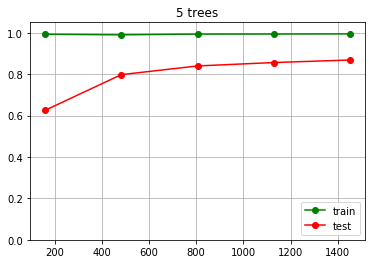

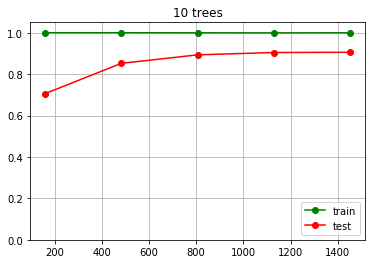

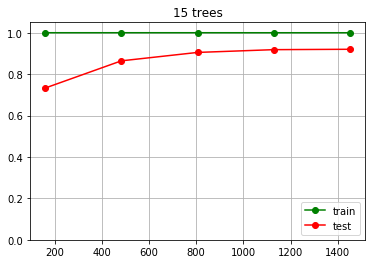

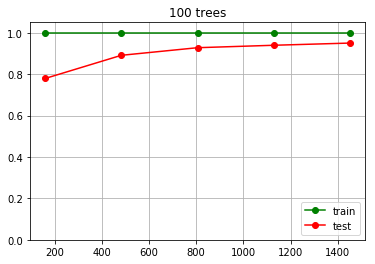

In [70]:
%pylab inline

# Questions 1-3
# Testing how number of trees influence testing score
rf_clf_5trees = ensemble.RandomForestClassifier(max_features=n_features, n_estimators=5, n_jobs=-1, random_state=1)
rf_clf_10trees = ensemble.RandomForestClassifier(max_features=n_features, n_estimators=10, n_jobs=-1, random_state=1)
rf_clf_15trees = ensemble.RandomForestClassifier(max_features=n_features, n_estimators=15, n_jobs=-1, random_state=1)

plot_learning_curve(rf_clf_5trees, '5 trees')
plot_learning_curve(rf_clf_10trees, '10 trees')
plot_learning_curve(rf_clf_15trees, '15 trees')
plot_learning_curve(rf_clf, '100 trees')

4) При большом количестве признаков (для данного датасета - 40, 50) качество классификации становится хуже, чем при малом количестве признаков (5, 10). Это связано с тем, что чем меньше признаков выбирается в каждом узле, тем более различными получаются деревья (ведь деревья сильно неустойчивы к изменениям в обучающей выборке), и тем лучше работает их композиция - **YES**

5) При большом количестве признаков (40, 50, 60) качество классификации лучше, чем при малом количестве признаков (5, 10). Это связано с тем, что чем больше признаков - тем больше информации об объектах, а значит алгоритм может делать прогнозы более точно.

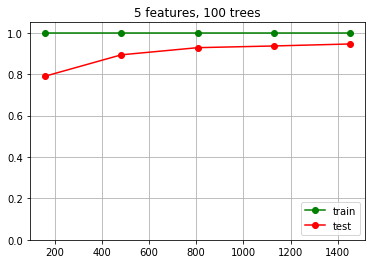

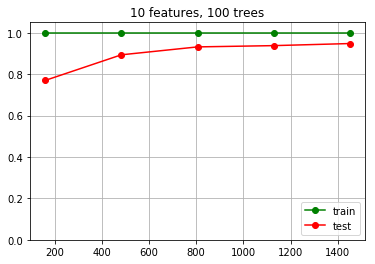

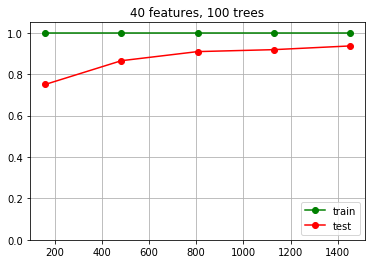

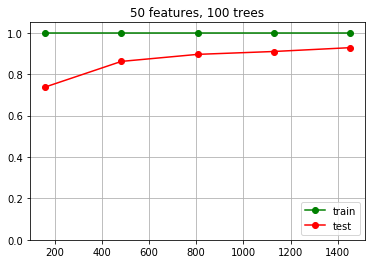

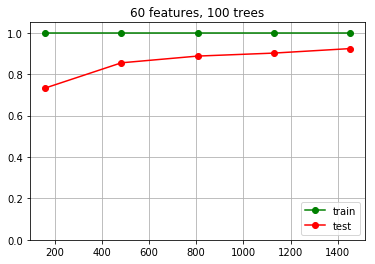

Wall time: 10min 8s


In [72]:
%%time
# Questions 4-5
# Testing how number of features influence test score
rf_clf_5features = ensemble.RandomForestClassifier(max_features=5, n_estimators=100, n_jobs=-1, random_state=1)
rf_clf_10features = ensemble.RandomForestClassifier(max_features=10, n_estimators=100, n_jobs=-1, random_state=1)
rf_clf_40features = ensemble.RandomForestClassifier(max_features=40, n_estimators=100, n_jobs=-1, random_state=1)
rf_clf_50features = ensemble.RandomForestClassifier(max_features=50, n_estimators=100, n_jobs=-1, random_state=1)
rf_clf_60features = ensemble.RandomForestClassifier(max_features=60, n_estimators=100, n_jobs=-1, random_state=1)

plot_learning_curve(rf_clf_5features, '5 features, 100 trees')
plot_learning_curve(rf_clf_10features, '10 features, 100 trees')
plot_learning_curve(rf_clf_40features, '40 features, 100 trees')
plot_learning_curve(rf_clf_50features, '50 features, 100 trees')
plot_learning_curve(rf_clf_60features, '60 features, 100 trees')

6) При небольшой максимальной глубине деревьев (5-6) качество работы случайного леса намного лучше, чем без ограничения глубины, т.к. деревья получаются не переобученными. С ростом глубины деревьев качество ухудшается.

7) При небольшой максимальной глубине деревьев (5-6) качество работы случайного леса заметно хуже, чем без ограничений, т.к. деревья получаются недообученными. С ростом глубины качество сначала улучшается, а затем не меняется существенно, т.к. из-за усреднения прогнозов и различий деревьев их переобученность в бэггинге не сказывается на итоговом качестве (все деревья преобучены по-разному, и при усреднении они компенсируют переобученность друг-друга). **YES**

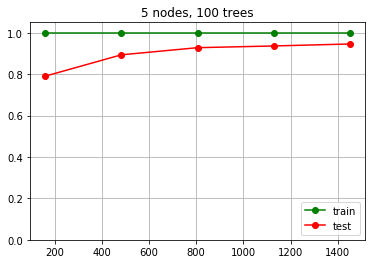

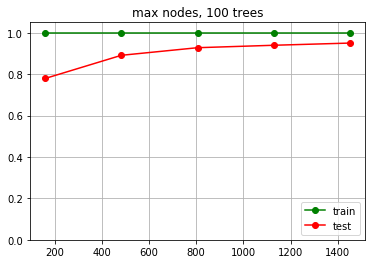

Wall time: 3min 43s


In [87]:
%%time
# Questions 6-7
# Testing how number of nodes influence test score
rf_clf_5nodes = ensemble.RandomForestClassifier(max_features=n_features, max_depth=5, n_estimators=100, n_jobs=-1, random_state=1)
rf_clf_max_nodes = ensemble.RandomForestClassifier(max_features=n_features, n_estimators=100, n_jobs=-1, random_state=1)

plot_learning_curve(rf_clf_5features, '5 nodes, 100 trees')
plot_learning_curve(rf_clf_max_nodes, 'max nodes, 100 trees')